# Exploring The Weather Trends

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Investigation Overview

In this data analysis we will analyze and explore the weather trends between Istanbul' s average temperatures and global world average temperatures based on the years.

We will create visualizations and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in Istanbul. 

### Dataset Overview

In this project we will be analyzing data associated with the weather trends. We will export the temperature data for the world as well as for the city of Istanbul.

#### Variable Descriptions 

Our dataset is including 5 variables.

* year : The Year of The Weather 
* city : City To Be Analyzed 
* country : Country To Be Analyzed 
* city_avg_temp : Average Temperature Of The City 
* global_avg_temp : Global Average Temperature

<a id='wrangling'></a>
## Data Wrangling

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

data=pd.read_csv(r'weather_data.csv')
data.head()

,year,city,country,city_avg_temp,global_avg_temp
0,1750,Istanbul,Turkey,13.83,8.72
1,1751,Istanbul,Turkey,14.14,7.98
2,1752,Istanbul,Turkey,9.48,5.78
3,1753,Istanbul,Turkey,13.42,8.39
4,1754,Istanbul,Turkey,13.58,8.47


In [ ]:
data.dtypes

year                 int64
city                object
country             object
city_avg_temp      float64
global_avg_temp    float64
dtype: object

In [ ]:
data.describe()

,year,city_avg_temp,global_avg_temp
count,264.000000,264.000000,264.000000
mean,1881.500000,13.510189,8.359394
std,76.354437,0.699959,0.575184
min,1750.000000,9.480000,5.780000
25%,1815.750000,13.090000,8.077500
50%,1881.500000,13.480000,8.365000
75%,1947.250000,13.950000,8.700000
max,2013.000000,16.020000,9.730000


<a id='eda'></a>

## Exploratory Data Analysis

In [ ]:
df = data[['year','city_avg_temp','global_avg_temp']]
df.set_index('year',inplace=True)
df.head()

,city_avg_temp,global_avg_temp
year,,
1750,13.83,8.72
1751,14.14,7.98
1752,9.48,5.78
1753,13.42,8.39
1754,13.58,8.47


Defining The DataFrames Of Istanbul & Global Temperature

In [ ]:
#Defining array to use and number of previous periods to use in calculation 
df_city_mov_avg=df['city_avg_temp']

n=10 #years/period
#Calculating the moving average
df1=pd.Series(df_city_mov_avg).rolling(window=n).mean().to_frame()
df1.head()

,city_avg_temp
year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN


In [ ]:
#Defining array to use and number of previous periods to use in calculation 
df_global_mov_avg=df['global_avg_temp']

n=10 #years/period
#Calculating moving average
df2=pd.Series(df_global_mov_avg).rolling(window=n).mean().to_frame()
df2.head()

,global_avg_temp
year,
1750,NaN
1751,NaN
1752,NaN
1753,NaN
1754,NaN


Combining The DataFrames Of Istanbul and Global Temperature

In [ ]:
df_last = pd.concat([df1, df2],axis=1)
df_last.head()

,city_avg_temp,global_avg_temp
year,,
1750,NaN,NaN
1751,NaN,NaN
1752,NaN,NaN
1753,NaN,NaN
1754,NaN,NaN


In [ ]:
df_last.isna().sum()

city_avg_temp      9
global_avg_temp    9
dtype: int64

In [ ]:
df_last=df_last.dropna()
df_last.isna().sum()

city_avg_temp      0
global_avg_temp    0
dtype: int64

In [ ]:
df_last.duplicated().any()

False

Plotting The Trends Of The Temperatures

In [ ]:
df_last.rename(columns={'city_avg_temp':'Istanbul Average Temperature','global_avg_temp':'Global Average Temperature'},inplace=True)
df_last.head()

,Istanbul Average Temperature,Global Average Temperature
year,,
1759,13.104,8.030
1760,12.978,7.877
1761,12.940,7.956
1762,13.358,8.239
1763,13.288,8.150


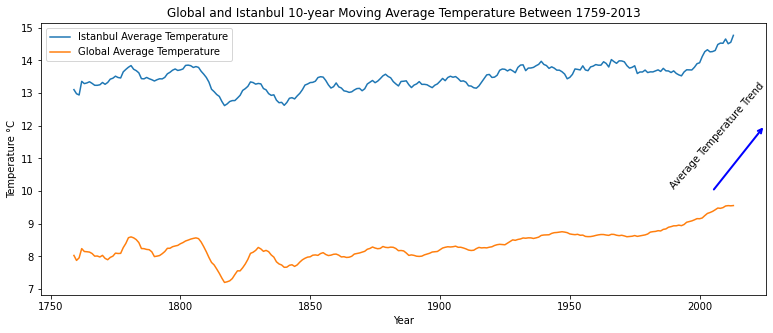

In [ ]:
df_last.plot(kind='line',figsize=(13,5)) #plotting with moving average                     
plt.title('Global and Istanbul 10-year Moving Average Temperature Between 1759-2013')
plt.xlabel('Year')
plt.ylabel('Temperature °C')
plt.annotate('Average Temperature Trend', #we will display text in here
             xy=(1988,10),                    
             rotation=49,                     
             va='bottom',                    
             ha='left',)                                 
plt.annotate('',                          #we will display arrow in here 
             xy=(2025, 12),           
             xytext=(2005, 10),         
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))      
plt.legend(loc='best')
plt.show()

Exploring The Correlation Between Istanbul and Global Temperature 

In [ ]:
df_corr=df_last[['Istanbul Average Temperature','Global Average Temperature']].corr(method='pearson')
df_corr

,Istanbul Average Temperature,Global Average Temperature
Istanbul Average Temperature,1.000000,0.906785
Global Average Temperature,0.906785,1.000000


In [ ]:
import scipy as sp
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_last['Global Average Temperature'], 
                                       df_last['Istanbul Average Temperature'])
print ("The Pearson Correlation Coefficient is", 
       pearson_coef, " with a P-value of P =", p_value)  

#Since the p-value is  <  0.001, the correlation between these variables 
#are statistically significant.

#Additionaly, we can see that the linear relationship is very strong too with the pearson 
#correlation coefficient value. (~0.91).

The Pearson Correlation Coefficient is 0.9067849426585403  with a P-value of P = 6.922034507745536e-97


[Text(0, 0.5, 'Istanbul Average Temperature'),
 Text(0, 1.5, 'Global Average Temperature')]

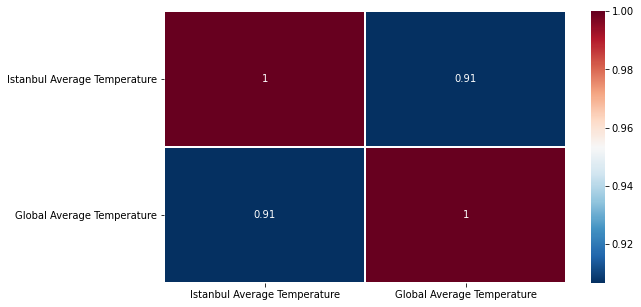

In [ ]:
#We can see the correlation between Istanbul and global temperature with a heatmap clearly in here too :
plt.figure(figsize=(9,5))
g=sns.heatmap(df_corr,xticklabels=df_corr.columns,yticklabels=
            df_corr.columns,cmap='RdBu_r',annot=True, linewidth=0.63)

g.set_xticklabels(g.get_xticklabels(), rotation=0, horizontalalignment='center')
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')

Making Predictions About The Temperatures Of Istanbul & Global 

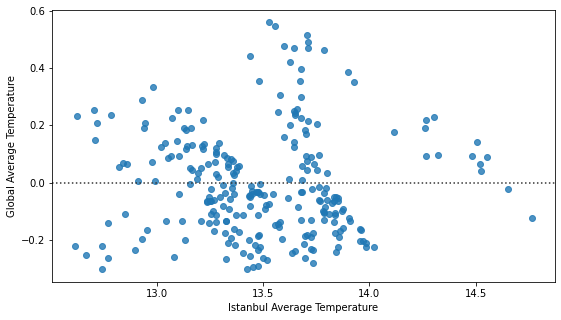

In [ ]:
plt.figure(figsize=(9, 5))
sns.residplot(df_last['Istanbul Average Temperature'], df_last['Global Average Temperature'])
plt.show()

#I used residual plot in here whether or not to see the linear model is appropriate or not.
#As you can see the data is randomly spread out around the x-axis, 
#then we can say that a linear model is appropriate for our prediction. 

Creating Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

X=df_last[['Istanbul Average Temperature']]
Y=df_last['Global Average Temperature']
#Y is our prediction. When we see a temperature of the city(Istanbul) we will then predict the temperature of the global.

lm.fit(X,Y)
Yhat=lm.predict(X)
Yhat[0:5]   

array([7.93725478, 7.80499691, 7.76510962, 8.20386983, 8.13039324])

In [ ]:
lm.intercept_,lm.coef_ #We calculated the intercept and the coefficient in here for our temperature prediction. 

(-5.817563030620066, array([1.04966558]))

The Final Estimated Linear Model We Get To Calculate Temperature 

So we get a final linear model with the structure of 𝑌ℎ𝑎𝑡=𝑎+𝑏𝑋.

Therefore we can say that our "Global Average Temperature = (Istanbul Average Temperature)*1.04 - 5.817".

<a id='conclusions'></a>
## Conclusions

Based on the observations about the weather trends we analyzed we inferred some implications.

First of all, it is seen that the temperature of the Istanbul is generally warmer than the global temperature and it keeps increasing. But between 1800-1850 we can see a drop in both side. Especially Istanbul's temperature drop between that period of time is eye-catching. Although Istanbul's temperature increased rapidly at the beginning of the 2000s,the global temperature increased at a lower rate.

In addition, it is seen that the temperature has increased by approximately 2-3 degrees. Plus, the general temperature is observed to increase on average especially after 1850s. Looking at the correlation diagram we can quickly see that the global temperature is strongly correlated to the Istanbul's temperature too. And generally we can say that in both the temperature period of increasing or decreasing looks similarly parallel.

At the end when we see our linear model with the structure of Global Temperature = (Istanbul Temperature)*1.04 - 5.817 and thereby we can estimate the temperatures of the weathers based on our linear model calcultions for the future too.